In [1]:
## working on finalizing a model given reduced set of data columns.
from datetime import datetime, timedelta
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.stats as stats
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline

import networkx as nx
from networkx.algorithms.components.connected import connected_components

%matplotlib notebook
%timeit

#show up to 100 columns.
pd.set_option('display.max_columns', 100, 'display.max_rows', 200)

In [2]:
## load pickle file with reduced data columns
file_name = 'theorem_reduced_2.pkl'
reduced_data = pd.read_pickle(file_name)

In [3]:
reduced_data.head()

,Cancelled,BoolPriorProsperLoanee,DolLoanAmountRequested,BorrowerRate,NumMonthsTerm,DolMonthlyIncome,FracDebtToIncomeRatio,StrEmploymentStatus,NumMonthsEmployed,NumPriorProsperLoansLatePayments,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup,NumTradesOpened6,NumOpenTradesDelinqOrPastDue6,DolTotalBalanceOnPublicRecords,NumRealEstateTrades,DolMonthlyDebt,NumCurrentDelinquencies,NumPublicRecordsLast10Years,NumPublicRecords12,DolAmountDelinquent,PctBankcardUtil,NumTotalInquiries,DaysSinceFirstCredit
ListingNumber,,,,,,,,,,,,,,,,,,,,,,,,,
973605,1,False,15000.0,0.1620,60,6000.0000,0.27,Employed,445.0,NaN,NaN,0,False,1,0,0,2,1242,0,0,0,0,0.97,5,13901
981099,1,False,15000.0,0.1585,60,7916.6667,0.35,Other,32.0,NaN,NaN,0,False,1,0,0,2,2289,0,0,0,0,0.48,3,14238
1025766,0,True,4000.0,0.2085,36,2083.3333,0.53,Employed,4.0,0.0,NaN,0,False,0,0,0,0,911,0,0,0,0,0.93,5,4146
1003835,1,False,10000.0,0.1299,36,3750.0000,0.14,Employed,2.0,NaN,NaN,0,False,1,0,0,0,223,0,0,0,0,0.26,1,2942
1011335,0,True,20000.0,0.1440,60,9000.0000,0.16,Employed,90.0,0.0,NaN,0,False,1,0,1249,1,1264,1,2,0,0,0.81,17,8329


In [4]:
## should booleans be converted with standard scaler?
m1 = linear_model.LogisticRegression()
x1 = reduced_data['BoolPriorProsperLoanee'].to_frame()
y = reduced_data['Cancelled']
m1.fit(x1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
m2 = linear_model.LogisticRegression()
standard_scaler = preprocessing.StandardScaler()
x2 = standard_scaler.fit_transform(x1)
m2.fit(x2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
m3 = linear_model.LogisticRegression()
robust_scaler = preprocessing.RobustScaler()
x3 = robust_scaler.fit_transform(x1)
m3.fit(x3,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
print(m1.coef_)
print(m2.coef_)
print(m3.coef_)
print(m1.intercept_)
print(m2.intercept_)
print(m3.intercept_)

[[-1.24148665]]
[[-0.30515356]]
[[-1.24148665]]
[-0.62693258]
[-0.7070492]
[-0.62693258]


In [14]:
print(m1.predict_proba(x1.min()))
print(m1.predict_proba(x1.max()))
print(m2.predict_proba(x2.min()))
print(m2.predict_proba(x2.max()))
print(m3.predict_proba(x3.min()))
print(m3.predict_proba(x3.max()))

[[ 0.65179361  0.34820639]]
[[ 0.86627526  0.13372474]]
[[ 0.65178852  0.34821148]]
[[ 0.86634409  0.13365591]]
[[ 0.65179361  0.34820639]]
[[ 0.86627526  0.13372474]]


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


A sanity check: Using RobustScaler and StandardScaler on a boolean variable makes a very minimal difference.

In [101]:
## let's try throwing in two variables and see what happens.
mm = linear_model.LogisticRegression()
standard_scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
x = reduced_data[['BoolPriorProsperLoanee','DolLoanAmountRequested']]
x_s = standard_scaler.fit_transform(x)
y = reduced_data['Cancelled']
mm.fit(x_s,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
mm.coef_

array([[-0.30160269,  0.15214037]])

In [104]:
xx, yy = np.mgrid[-4:4:.01, -4:4:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = mm.predict_proba(grid)[:, 1].reshape(xx.shape)

<IPython.core.display.Javascript object>


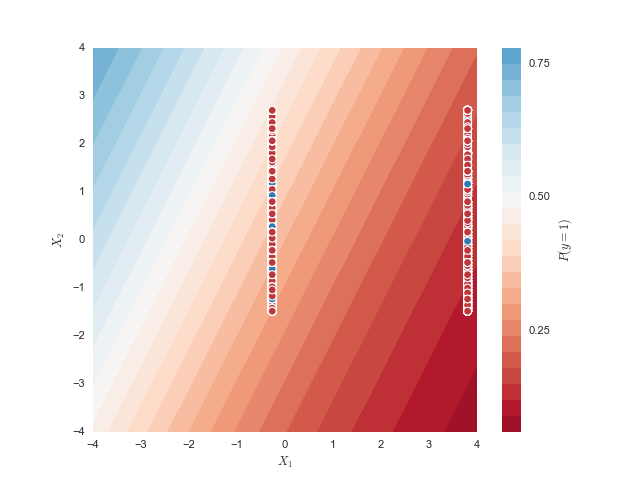

[(-4, 4),
 (-4, 4),
 None]

In [105]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(x_s[100:,0], x_s[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-4, 4), ylim=(-4, 4),
       xlabel="$X_1$", ylabel="$X_2$")

Plot above reveals that when first-time loanees request large loans, they are more likely to wind up canceling.

In [ ]:
## let's start plotting some ROC curves and see if adding variables is improving our skill.

<IPython.core.display.Javascript object>


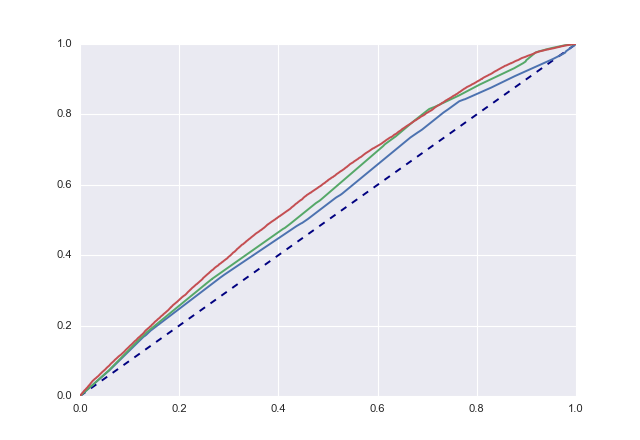

[[ 0.63779709  0.36220291]
 [ 0.69954269  0.30045731]
 [ 0.68410653  0.31589347]
 [ 0.71030059  0.28969941]
 [ 0.66133791  0.33866209]
 [ 0.63779709  0.36220291]
 [ 0.70171246  0.29828754]
 [ 0.71453931  0.28546069]
 [ 0.68410653  0.31589347]
 [ 0.71242461  0.28757539]
 [ 0.66133791  0.33866209]
 [ 0.56352391  0.43647609]
 [ 0.66133791  0.33866209]
 [ 0.71030059  0.28969941]
 [ 0.71030059  0.28969941]
 [ 0.6473005   0.3526995 ]
 [ 0.71030059  0.28969941]
 [ 0.70171246  0.29828754]
 [ 0.68410653  0.31589347]
 [ 0.61357605  0.38642395]]
[[ 0.16317715]]


//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


[[ 0.62441621  0.37558379]
 [ 0.68554464  0.31445536]
 [ 0.67020291  0.32979709]
 [ 0.6962626   0.3037374 ]
 [ 0.64764859  0.35235141]
 [ 0.62441621  0.37558379]
 [ 0.68770461  0.31229539]
 [ 0.70049164  0.29950836]
 [ 0.67020291  0.32979709]
 [ 0.69838133  0.30161867]
 [ 0.64764859  0.35235141]
 [ 0.55161163  0.44838837]
 [ 0.64764859  0.35235141]
 [ 0.6962626   0.3037374 ]
 [ 0.6962626   0.3037374 ]
 [ 0.63378496  0.36621504]
 [ 0.6962626   0.3037374 ]
 [ 0.68770461  0.31229539]
 [ 0.67020291  0.32979709]
 [ 0.60059667  0.39940333]]
[[-0.30253921  0.15834587]]
[[ 0.58666446  0.41333554]
 [ 0.72833835  0.27166165]
 [ 0.68351871  0.31648129]
 [ 0.64850069  0.35149931]
 [ 0.70066688  0.29933312]
 [ 0.6087822   0.3912178 ]
 [ 0.68027871  0.31972129]
 [ 0.68995618  0.31004382]
 [ 0.69216089  0.30783911]
 [ 0.68277666  0.31722334]
 [ 0.70066688  0.29933312]
 [ 0.52569862  0.47430138]
 [ 0.66328552  0.33671448]
 [ 0.73286698  0.26713302]
 [ 0.70975902  0.29024098]
 [ 0.60631596  0.39368404]

In [188]:
variables = [['DolLoanAmountRequested'],['BoolPriorProsperLoanee','DolLoanAmountRequested'],\
       ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil']]
#            ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil','NumTotalInquiries']]

y = reduced_data['Cancelled']
X = []
X_train = []
X_test = []
y_train = []
y_test = []

fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

for i,v in enumerate(variables):
    standard_scaler = preprocessing.StandardScaler()
    X.append(standard_scaler.fit_transform(reduced_data[v]))
    X_tr, X_te, y_tr, y_te = train_test_split(X[i], y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    print(probs[:20])
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    plt.legend()
    print(logm.coef_)

In [135]:
## the one thing about these loans is that only 6.5% of them are from previous loanees - so we don't learn a lot in the
## case of most loans.
reduced_data['BoolPriorProsperLoanee'].value_counts(normalize = True)

False    0.935481
True     0.064519
Name: BoolPriorProsperLoanee, dtype: float64

Pretty cool - this series of ROC curves shows that starting with DolLoanAmountRequested, then adding BoolPriorProsperLoanee, then PctBankcardUtil, all make successive contributions to quality of fit.

On the other hand, adding NumTotalInquiries makes no perceptable impact on the resulting ROC curve.

In [153]:
## important step...let's test the treatment of the categorical variable.
reduced_data['StrEmploymentStatus'].replace(['Part-time','Not employed'],'Other',inplace = True)
X_test = reduced_data['StrEmploymentStatus'].to_frame()
X_dummies = pd.get_dummies(X_test)

m_dummies = linear_model.LogisticRegression()
m_dummies.fit(X_dummies,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [158]:
X_dummies.head()

,StrEmploymentStatus_Employed,StrEmploymentStatus_Full-time,StrEmploymentStatus_Other,StrEmploymentStatus_Self-employed
ListingNumber,,,,
973605,1,0,0,0
981099,0,0,1,0
1025766,1,0,0,0
1003835,1,0,0,0
1011335,1,0,0,0


In [154]:
m_dummies.coef_

array([[-0.00222737, -0.72691812,  0.68551476, -0.6631983 ]])

<IPython.core.display.Javascript object>


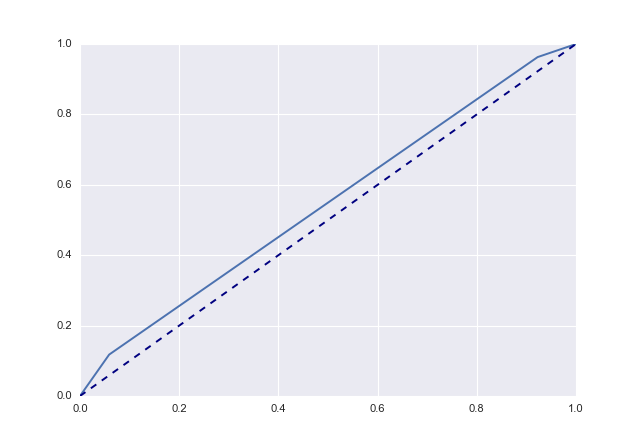

In [157]:
X_tr, X_te, y_tr, y_te = train_test_split(X_dummies, y, test_size=0.3, random_state=0)
probs = m_dummies.predict_proba(X_te)

fig, ax = plt.subplots()
fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


In [185]:
variables = ['BoolPriorProsperLoanee','DolLoanAmountRequested','PctBankcardUtil']

y = reduced_data['Cancelled']
X = reduced_data[variables]
X_full = pd.concat([X,X_dummies], axis=1)

<IPython.core.display.Javascript object>


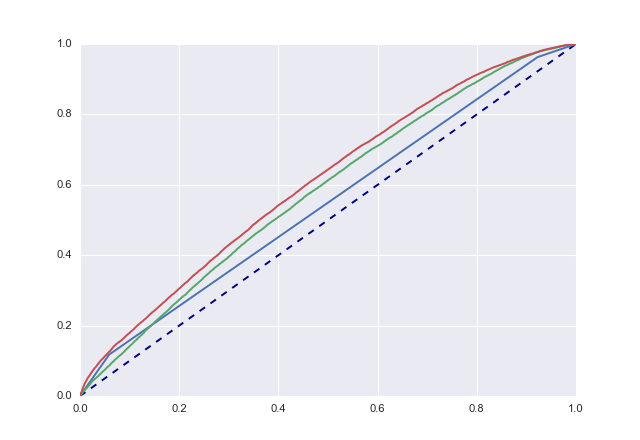

[[ 0.00223078 -0.75684759  0.67767825 -0.63696438]]
[[-0.30678644  0.16329316 -0.1515659 ]]
[[-0.30072478  0.1711396  -0.15424153 -0.02124451 -0.02022657  0.17427729
  -0.15844917]]


In [186]:
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

standard_scaler1 = preprocessing.StandardScaler()
X_s = standard_scaler1.fit_transform(X)

standard_scaler2 = preprocessing.StandardScaler()
X_full_s = standard_scaler2.fit_transform(X_full)

for X in [X_dummies, X_s, X_full_s]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

Adding job type notably increases area under curve, especially at the fringes - again, small sub-populations (like
those who respond 'other' as job status) where we're able to make much stronger predictions.

<IPython.core.display.Javascript object>


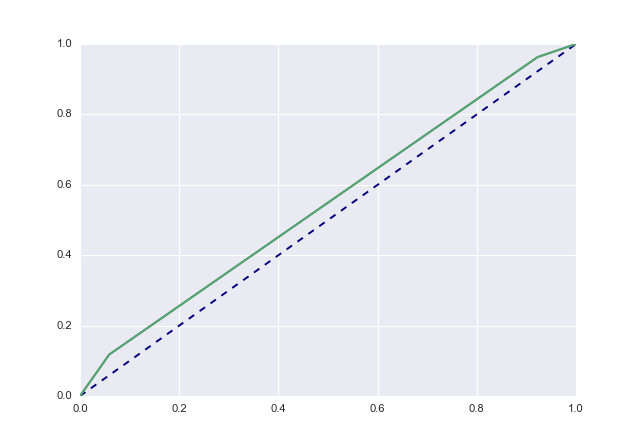

[[ 0.00223078 -0.75684759  0.67767825 -0.63696438]]
[[-0.76188468  0.67544848 -0.63919356]]


In [178]:
## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

Xd1 = X_dummies
Xd2 = Xd1.drop('StrEmploymentStatus_Employed', axis=1)

for X in [Xd1, Xd2]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)

<IPython.core.display.Javascript object>


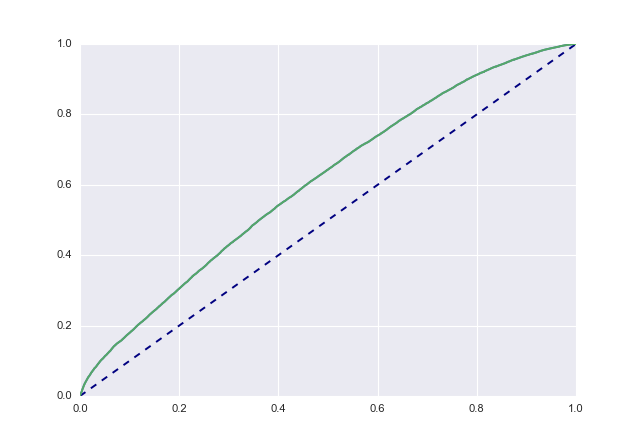

[[-0.30072478  0.1711396  -0.15424153 -0.02124451 -0.02022657  0.17427729
  -0.15844917]]
[[-0.30072244  0.17113163 -0.15423595 -0.01721943  0.19055501 -0.14377294]]


In [184]:
## let's test further if dropping one of the columns makes a difference...probably should not
fig, ax = plt.subplots()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

Xf1 = X_full_s
X_temp = X_full.drop('StrEmploymentStatus_Employed', axis = 1)
ssc = preprocessing.StandardScaler()
Xf2 = ssc.fit_transform(X_temp)

for X in [Xf1, Xf2]:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
    logm = linear_model.LogisticRegression()
    logm.fit(X_tr,y_tr)
    probs = logm.predict_proba(X_te)
    fpr, tpr, thresholds = metrics.roc_curve(y_te,probs[:,1])
    plt.plot(fpr,tpr)
    print(logm.coef_)